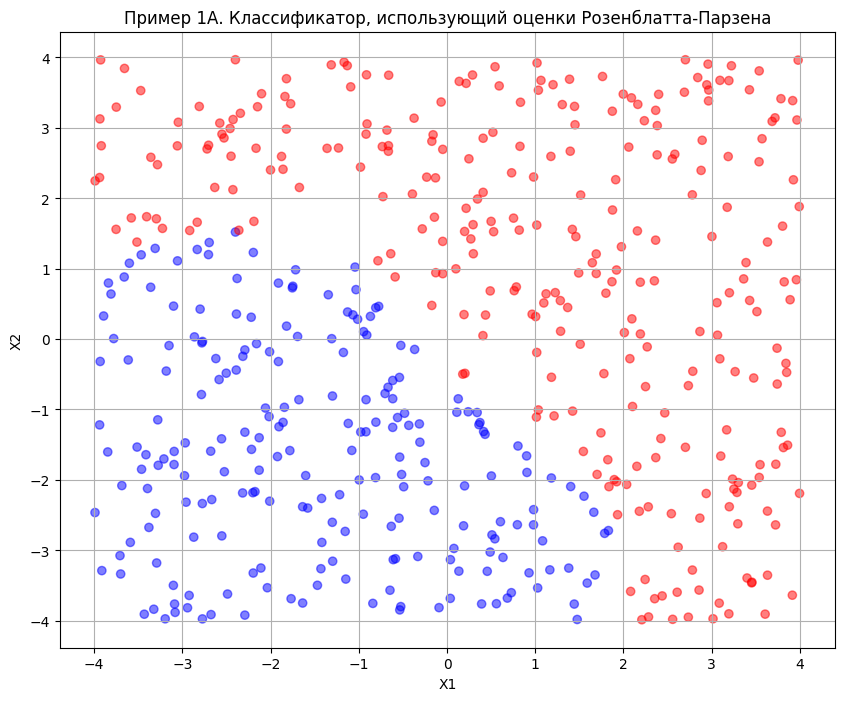

Вероятность ошибки: 0.1700
Доверительный интервал: [0.1371, 0.2029]


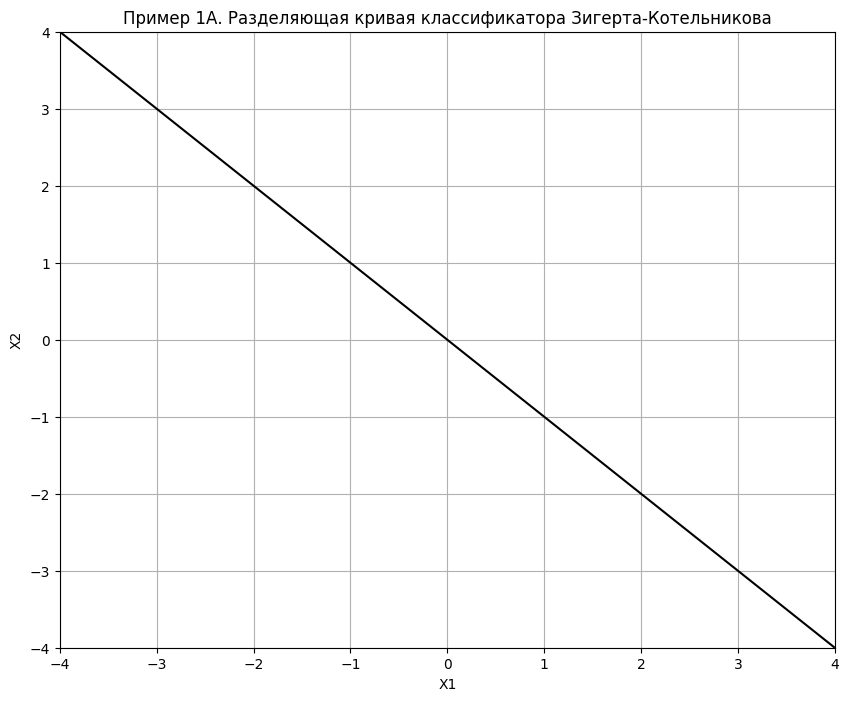

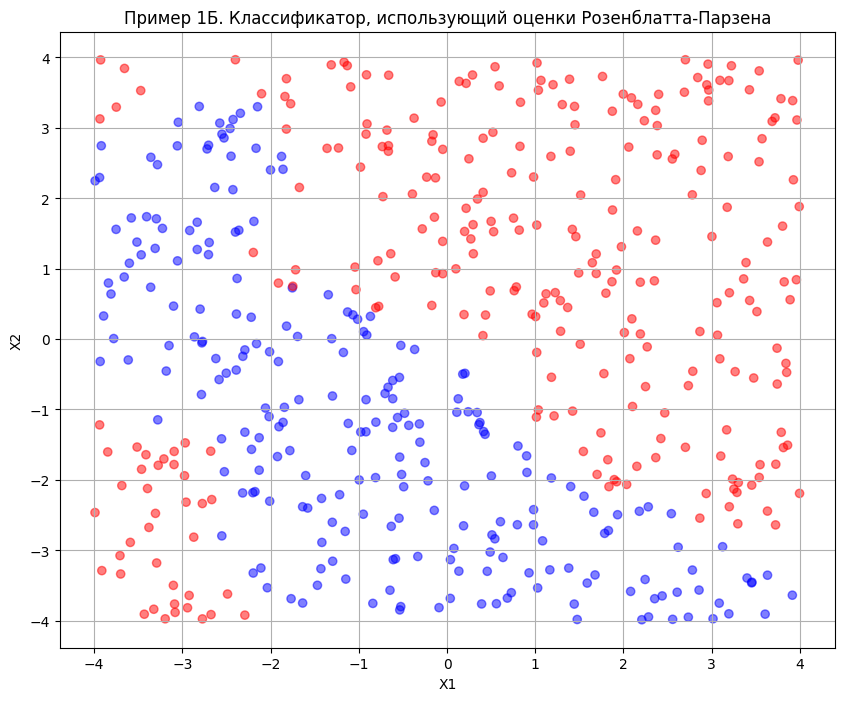

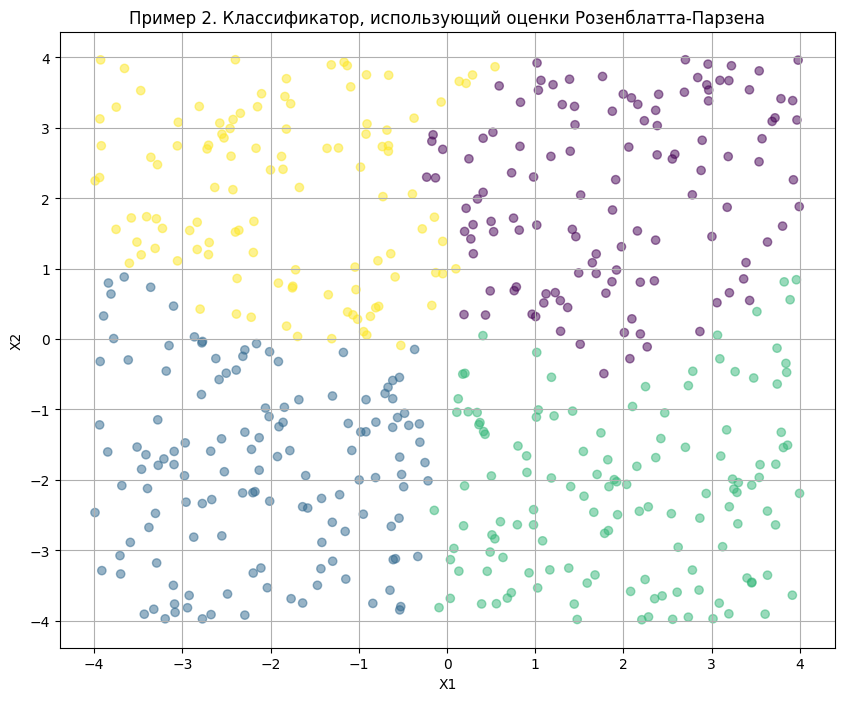

In [43]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal, norm
import matplotlib.pyplot as plt

# Данные задачи
mu1 = np.array([-1, -1])
mu2 = np.array([1, 1])
sigma1 = np.array([[1, 0], [0, 1]])
sigma2 = np.array([[1, 0], [0, 1]])

def p_i(x, y, x_ij, y_ij, h_i):
    """Функция расчёта плотности вероятности Розенблатта-Парзена."""
    return (1 / (2 * np.pi * h_i**2)) * np.exp(-0.5 * (((x - x_ij) / h_i)**2 + ((y - y_ij) / h_i)**2))

def adaptive_zigert_kotelnikov(x, y, data, h_values):
    """Классификатор на основе оценок Розенблатта-Парзена."""
    classes = np.unique(data['class'])
    M_i = data['class'].value_counts().to_dict()
    M = len(data)
    p_values = []
    
    for i in classes:
        h_i = h_values[int(i) - 1]
        x_ij = data.loc[data['class'] == i, 'x']
        y_ij = data.loc[data['class'] == i, 'y']
        p_values.append(np.sum(p_i(x, y, x_ij, y_ij, h_i)) * (M_i[i] / M))
    
    max_value = np.max(p_values)
    if np.sum((p_values == max_value) & np.isfinite(p_values)) > 1:
        return 0
    else:
        return np.argmax(p_values) + 1

# Значения h
h_values = [0.5, 0.7]

# Генерация тренировочных данных
np.random.seed(123)
class1 = np.random.multivariate_normal(mu1, sigma1, 20)
class2 = np.random.multivariate_normal(mu2, sigma2, 20)

training_data = pd.DataFrame({
    'x': np.concatenate([class1[:, 0], class2[:, 0]]),
    'y': np.concatenate([class1[:, 1], class2[:, 1]]),
    'class': np.concatenate([np.ones(20), np.ones(20) * 2])
})

# Генерация новых данных
np.random.seed(456)
new_data = pd.DataFrame({
    'x': np.random.uniform(-4, 4, 500),
    'y': np.random.uniform(-4, 4, 500)
})
true_classes = np.where((new_data['x'] < 0) & (new_data['y'] < 0), 1, 2)

new_data['class'] = new_data.apply(lambda row: adaptive_zigert_kotelnikov(row['x'], row['y'], training_data, h_values), axis=1)

# Генерация сетки
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
grid_x, grid_y = np.meshgrid(x_vals, y_vals)
grid_data = pd.DataFrame({
    'x': grid_x.ravel(),
    'y': grid_y.ravel()
})
grid_data['class'] = grid_data.apply(lambda row: adaptive_zigert_kotelnikov(row['x'], row['y'], training_data, h_values), axis=1)

# Визуализация данных
plt.figure(figsize=(10, 8))
plt.scatter(new_data['x'], new_data['y'], c=new_data['class'], cmap='bwr', label='Классифицированные точки', alpha=0.5)
plt.title("Пример 1А. Классификатор, использующий оценки Розенблатта-Парзена")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

# Вероятность ошибки
error_rate = np.mean(new_data['class'] != true_classes)
confidence_interval = norm.ppf(0.975) * np.sqrt((error_rate * (1 - error_rate)) / len(new_data))

print(f"Вероятность ошибки: {error_rate:.4f}")
print(f"Доверительный интервал: [{error_rate - confidence_interval:.4f}, {error_rate + confidence_interval:.4f}]")

# Разделяющая кривая
grid_data['p1'] = multivariate_normal.pdf(grid_data[['x', 'y']], mean=mu1, cov=sigma1)
grid_data['p2'] = multivariate_normal.pdf(grid_data[['x', 'y']], mean=mu2, cov=sigma2)
grid_data['decision_boundary'] = grid_data['p1'] * 0.5 - grid_data['p2'] * 0.5

plt.figure(figsize=(10, 8))
plt.contour(grid_x, grid_y, grid_data['decision_boundary'].values.reshape(100, 100), levels=[0], colors='black')
plt.title("Пример 1А. Разделяющая кривая классификатора Зигерта-Котельникова")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

# Функции для классификатора
def p_i(x, y, x_ij, y_ij, h_i):
    """Плотность вероятности Розенблатта-Парзена."""
    return (1 / (2 * np.pi * h_i**2)) * np.exp(-0.5 * (((x - x_ij) / h_i)**2 + ((y - y_ij) / h_i)**2))

def adaptive_zigert_kotelnikov(x, y, data, h_values):
    """Классификатор на основе оценок Розенблатта-Парзена."""
    classes = np.unique(data['class'])
    M_i = data['class'].value_counts().to_dict()
    M = len(data)
    p_values = []

    for i in classes:
        h_i = h_values[int(i) - 1]
        x_ij = data.loc[data['class'] == i, 'x']
        y_ij = data.loc[data['class'] == i, 'y']
        p_values.append(np.sum(p_i(x, y, x_ij, y_ij, h_i)) * (M_i[i] / M))

    max_value = np.max(p_values)
    if np.sum((p_values == max_value) & np.isfinite(p_values)) > 1:
        return 0
    else:
        return np.argmax(p_values) + 1

# Пример 1Б
mu1 = np.array([-1, -1])
mu2 = np.array([1, 1])
sigma1 = np.array([[1, -0.75], [-0.75, 1]])
sigma2 = np.array([[2, 1], [1, 2]])
h_values = [0.5, 0.7]

# Генерация тренировочных данных
np.random.seed(123)
class1 = np.random.multivariate_normal(mu1, sigma1, 20)
class2 = np.random.multivariate_normal(mu2, sigma2, 20)

training_data = pd.DataFrame({
    'x': np.concatenate([class1[:, 0], class2[:, 0]]),
    'y': np.concatenate([class1[:, 1], class2[:, 1]]),
    'class': np.concatenate([np.ones(20), np.ones(20) * 2])
})

# Генерация новых данных
np.random.seed(456)
new_data = pd.DataFrame({
    'x': np.random.uniform(-4, 4, 500),
    'y': np.random.uniform(-4, 4, 500)
})
true_classes = np.where((new_data['x'] < 0) & (new_data['y'] < 0), 1, 2)

new_data['class'] = new_data.apply(lambda row: adaptive_zigert_kotelnikov(row['x'], row['y'], training_data, h_values), axis=1)

# Визуализация данных
plt.figure(figsize=(10, 8))
plt.scatter(new_data['x'], new_data['y'], c=new_data['class'], cmap='bwr', alpha=0.5)
plt.title("Пример 1Б. Классификатор, использующий оценки Розенблатта-Парзена")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

# Пример 2
mu1, mu2, mu3, mu4 = np.array([1, 1]), np.array([-1, -1]), np.array([1, -1]), np.array([-1, 1])
sigma = np.array([[1, 0], [0, 1]])
h_values = [0.5, 0.7, 0.6, 0.8]

# Генерация тренировочных данных
np.random.seed(123)
class1 = np.random.multivariate_normal(mu1, sigma, 20)
class2 = np.random.multivariate_normal(mu2, sigma, 20)
class3 = np.random.multivariate_normal(mu3, sigma, 20)
class4 = np.random.multivariate_normal(mu4, sigma, 20)

training_data = pd.DataFrame({
    'x': np.concatenate([class1[:, 0], class2[:, 0], class3[:, 0], class4[:, 0]]),
    'y': np.concatenate([class1[:, 1], class2[:, 1], class3[:, 1], class4[:, 1]]),
    'class': np.concatenate([np.ones(20), np.ones(20) * 2, np.ones(20) * 3, np.ones(20) * 4])
})

# Генерация новых данных
np.random.seed(456)
new_data = pd.DataFrame({
    'x': np.random.uniform(-4, 4, 500),
    'y': np.random.uniform(-4, 4, 500)
})
true_classes = np.where(
    (new_data['x'] < 0) & (new_data['y'] < 0), 1,
    np.where(
        (new_data['x'] > 0) & (new_data['y'] < 0), 2,
        np.where((new_data['x'] < 0) & (new_data['y'] > 0), 3, 4)
    )
)

new_data['class'] = new_data.apply(lambda row: adaptive_zigert_kotelnikov(row['x'], row['y'], training_data, h_values), axis=1)

# Визуализация данных
plt.figure(figsize=(10, 8))
plt.scatter(new_data['x'], new_data['y'], c=new_data['class'], cmap='viridis', alpha=0.5)
plt.title("Пример 2. Классификатор, использующий оценки Розенблатта-Парзена")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()
